In [ ]:
import numpy as np
from dtw import dtw
from pandas import Series
from pandas import TimeGrouper
from pandas import DataFrame
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.cluster import KMeans

import pandas as pd
%pylab inline
from pylab import rcParams

rcParams['figure.figsize'] = 16,4

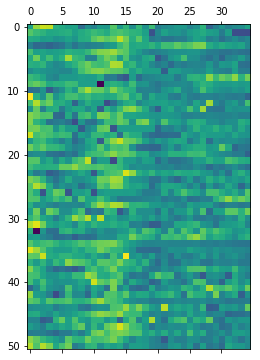

In [2]:
series = pd.DataFrame.from_csv('Dataset/databasePreprocessing.csv', header=0)
matshow(series.T, interpolation=None, aspect='auto')

In [4]:
kmeans = KMeans()
train_data = series.T

In [5]:
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
list(kmeans.cluster_centers_[0])

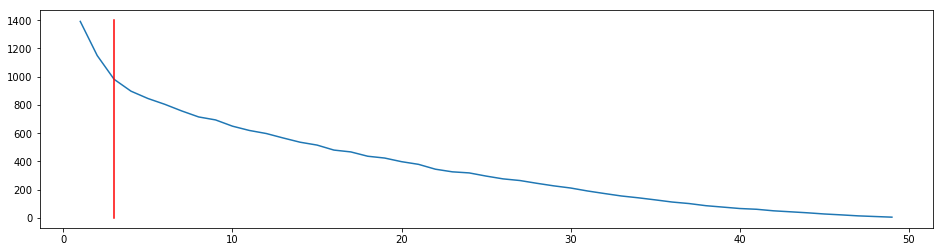

In [15]:
# kmeans
sse_list = list()
max_k = 50
for k in range(1,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(1,max_k), sse_list)
plot([3,3],[0,1400],'r-')

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(series.T)
plot(km.labels_)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'sse', kmeans.inertia_
from scipy.stats import itemfreq
print itemfreq(km.labels_)
plot([51,0],[1,1],'r-')
plot([51,0],[2,2],'b-')
plot([51,0],[0,0],'y-')

In [22]:
from scipy.spatial.distance import euclidean
state_list = series.keys()[:51]
dd1 = [ [ (euclidean(series[state_list[x]],series[state_list[y]]) if y > x else -1)  for y in range(len(state_list)) ] 
       for x in range(len(state_list)) ]
dd2 = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(state_list)) ] for x in range(len(state_list)) ]
for i in range(len(state_list)):
    dd2[i][i] = 0.0

Stress value:  5536.30120993


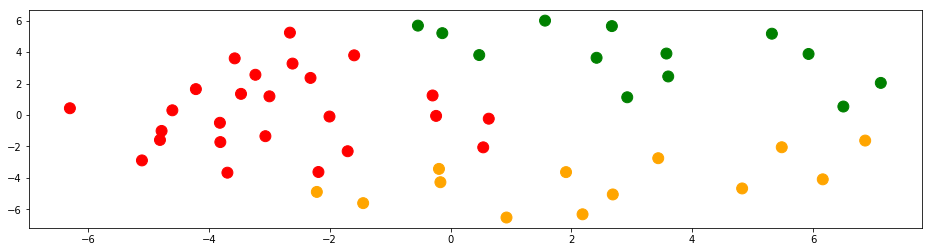

In [23]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dd2)
print "Stress value: ", pos.stress_

db = KMeans(n_clusters=3).fit(dd2)
cols = ['lightgray', 'red', 'green', 'orange', 'blue']
cc = [ cols[l+1] for l in km.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

In [ ]:
df_clusters = series.T
df_clusters['Cluster'] = db.labels_

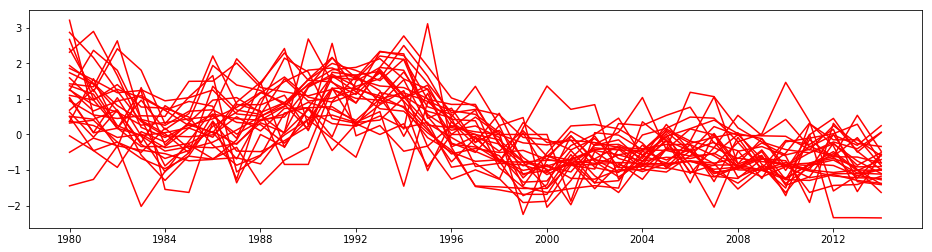

In [57]:
for i in range(len(km.labels_)):
    if db.labels_[i] == 0:
        plot(series[state_list[i]],'r-')

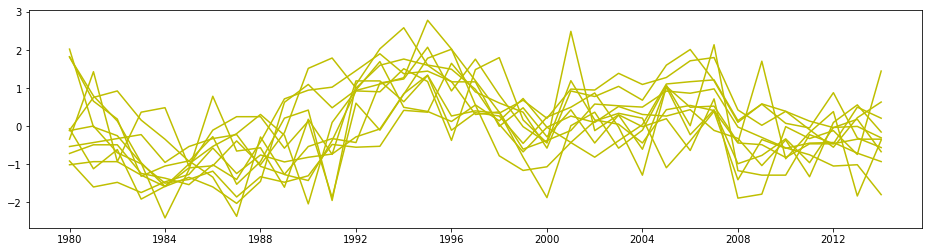

In [58]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 1:
        plot(series[state_list[i]],'y-')

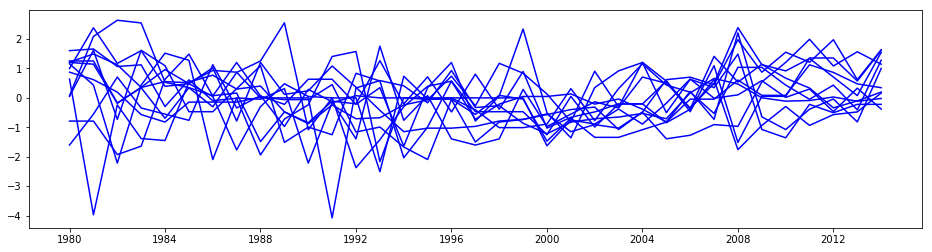

In [59]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 2:
        plot(series[state_list[i]],'b-')

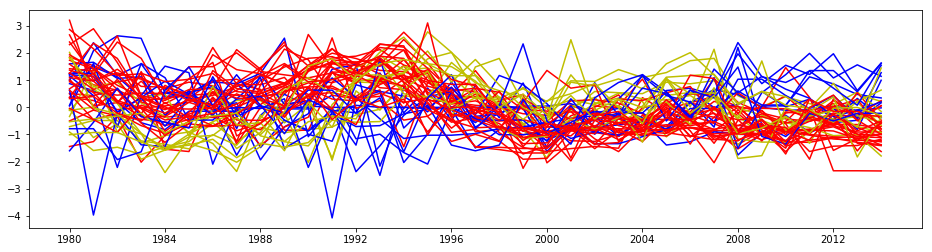

In [60]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 0:
        plot(series[state_list[i]],'r-')
    elif db.labels_[i] == 1:
        plot(series[state_list[i]],'y-')
    elif db.labels_[i] == 2:
        plot(series[state_list[i]],'b-')